In [14]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.datasets import mnist
import torch.nn.functional as F

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [16]:
# Puting data in a more usable format
test = pd.read_csv("archive/mnist_test.csv")
test_labels = test.loc[:, "label"].to_numpy()

test = (test.drop(labels="label", axis=1).to_numpy()).reshape(-1, 28,28)
test_labels = torch.from_numpy(np.eye(10)[test_labels]).to(torch.float32)


train = pd.read_csv("archive/mnist_train.csv")
train_labels = train.loc[:, "label"].to_numpy()

train = (train.drop(labels="label", axis=1).to_numpy()).reshape(-1,28, 28)
train_labels = torch.from_numpy(np.eye(10)[train_labels]).to(torch.float32)

train = (torch.from_numpy(train).reshape(-1, 784) * 1.0)/255
test = (torch.from_numpy(test).reshape(-1, 784)*1.0)/255


In [17]:
class PleaseWorkNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 284)
        self.l2 = nn.Linear(284, 50)
        self.l3 = nn.Linear(50,10)
        self.ReLu = nn.ReLU()
    
    def forward(self, x):
        x = self.ReLu(self.l1(x))
        x = self.ReLu(self.l2(x))
        # x = self.ReLu(self.l3(x))
        x = self.l3(x)
        return x

In [18]:
from tqdm import trange

net = PleaseWorkNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

losses = []

for i in range(2):
    print(f"epoch {i+1}:")
    for i in trange(train.shape[0]):
        optimizer.zero_grad()
        output = net(train[i])
        loss = criterion(output, train_labels[i])
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

epoch 1:


100%|██████████| 60000/60000 [01:14<00:00, 803.98it/s]


epoch 2:


100%|██████████| 60000/60000 [01:14<00:00, 809.10it/s]


In [23]:
counter = 0
correct = 0
incorrect = []

for i, data in enumerate(test):
    output = torch.argmax(net(test[i])).item()
    suggested = torch.argmax(test_labels[i]).item()

    if output == suggested:
        correct+= 1
    else:
        incorrect.append(i)
    counter += 1

print(f"Accuracy: {correct/counter * 100}%")

Accuracy: 87.75%


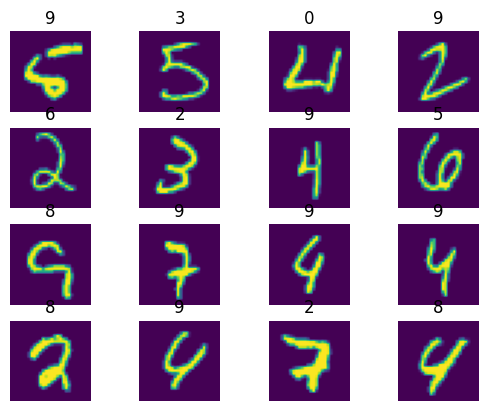

In [26]:
import matplotlib.pyplot as plt
import numpy as np

incorrect = incorrect[0:16]

# Define a grid of images and their titles
images = [test[i].reshape(28,28).numpy() for i in incorrect]
titles = [torch.argmax(net(test[i])).item() for i in incorrect]

# Create a grid of axes
fig, axes = plt.subplots(nrows=4, ncols=4)

# Loop over the axes and display the images and titles
for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.show()
